In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_excel("Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# Find Missing Values
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [8]:
# Drop
train_data.dropna(inplace=True)

In [9]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Exploratory Data Analysis

In [11]:
def change_to_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [12]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_to_datetime(i)

In [14]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month
train_data['Journey_year'] = train_data['Date_of_Journey'].dt.year

In [16]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-11-20 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-20 05:50:00,2021-11-20 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-20 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-11-20 18:05:00,2021-11-20 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-11-20 16:50:00,2021-11-20 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [17]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-11-20 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-20 05:50:00,2021-11-20 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-20 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-11-20 18:05:00,2021-11-20 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-11-20 16:50:00,2021-11-20 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [19]:
# Extracting Hour and Minute from Arrival & Departure Time
def extract_time(df,col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute'] = df[col].dt.minute

def drop_column(df,col):
    df.drop(col, axis=1, inplace=True)

In [20]:
extract_time(train_data, 'Arrival_Time')
drop_column(train_data, 'Arrival_Time')

In [21]:
extract_time(train_data, 'Dep_Time')
drop_column(train_data, 'Dep_Time')

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50


In [23]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,14,10,11,30


In [24]:
duration_list = list(train_data['Duration'])
duration_list

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [25]:
x = '2h 30m'
len(x.split(' '))

2

In [26]:
for i in range (len(duration_list)):
    if len(duration_list[i].split(' '))==2:
        pass
    else:
        if 'h' in duration_list[i]:
            duration_list[i] = duration_list[i] + ' 0m'
        else:
            duration_list[i] = '0h ' + duration_list[i]

In [27]:
duration_list

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [28]:
train_data['Duration'] = duration_list
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50


In [29]:
'4h 45m'.split(' ')

['4h', '45m']

In [30]:
'4h 45m'.split(' ')[0]

'4h'

In [31]:
'4h 45m'.split(' ')[0][0:-1]

'4'

In [32]:
'4h 45m'.split(' ')[1][0:-1]

'45'

In [33]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [34]:
train_data['Duration_Hours'] = train_data['Duration'].apply(hour)
train_data['Duration_Minutes'] = train_data['Duration'].apply(minute)

In [35]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,4,2019,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,14,10,11,30,2,40


In [36]:
drop_column(train_data, 'Duration')
train_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,2019,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,2019,14,10,11,30,2,40


In [37]:
train_data.loc[[6474]]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Hours,Duration_Minutes
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,3,6,2019,16,55,16,50,0,5


In [38]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Journey_year            int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Duration_Hours         object
Duration_Minutes       object
dtype: object

In [39]:
train_data['Duration_Hours'] = pd.to_numeric(train_data['Duration_Hours'])

In [40]:
train_data['Duration_Minutes'] = pd.to_numeric(train_data['Duration_Minutes'])

In [41]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Journey_year            int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Duration_Hours          int64
Duration_Minutes        int64
dtype: object

## Handling Categorical Data

In [42]:
cat_col = [col for col in train_data.columns if train_data[col].dtypes=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [43]:
cont_col = [col for col in train_data.columns if train_data[col].dtypes!='O']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Duration_Hours',
 'Duration_Minutes']

### Categorical Data
#####   1. Nominal Data - Data that is not in any order. OneHotEncoder can be used to handle this data.
#####   2. Ordinal Data - Data that is in order. LabelEncoder can be used to handle this data.

In [44]:
categorical = train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [45]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

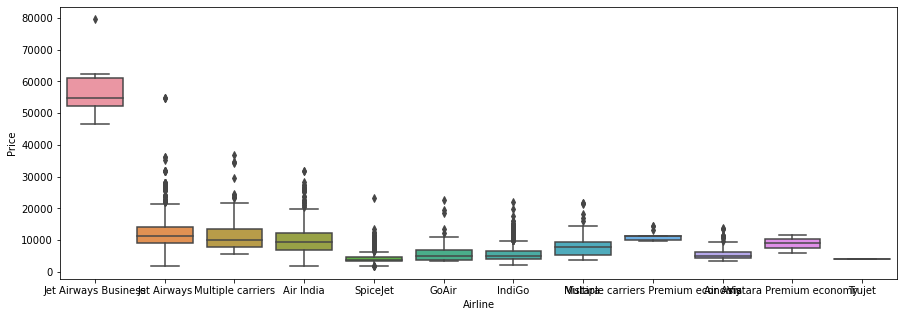

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline', y='Price', data=train_data.sort_values('Price', ascending=False))

In [47]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,21,35,16,50,4,45


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

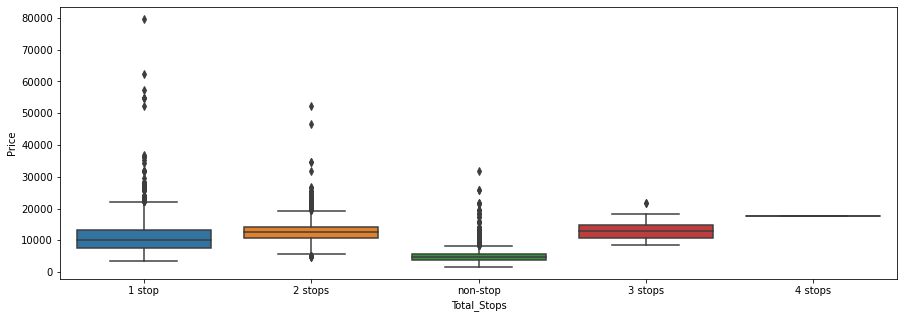

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops', y='Price', data=train_data.sort_values('Price', ascending=False))

In [49]:
Airline = pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [50]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

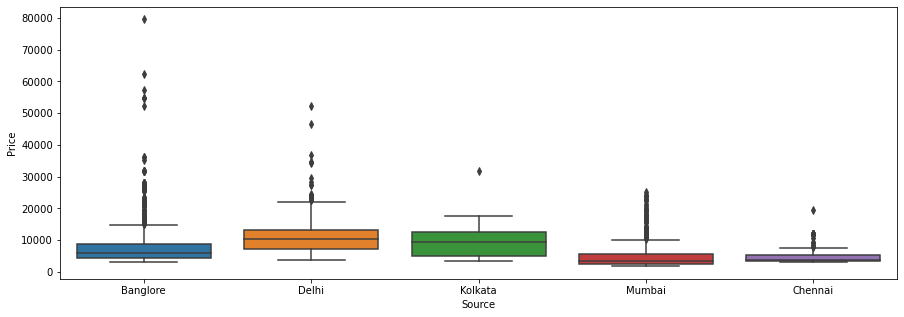

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Source', y='Price', data=train_data.sort_values('Price', ascending=False))

In [52]:
Source = pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [53]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

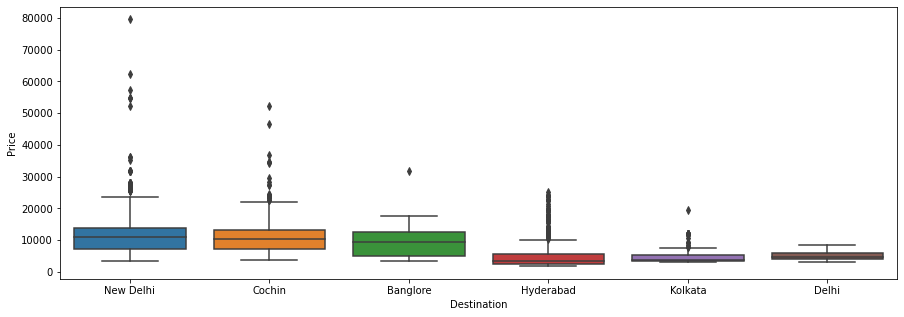

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination', y='Price', data=train_data.sort_values('Price', ascending=False))

In [55]:
Destination = pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [56]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [57]:
categorical['Route'].str.split('→')

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [58]:
pd.options.mode.chained_assignment = None

In [59]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

In [60]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [61]:
drop_column(categorical,'Route')

In [62]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [63]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [64]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None', inplace=True)

In [65]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [66]:
# Printing number of categories in each column
for i in categorical.columns:
    print('{} has total {} categories'.format(i, len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [67]:
# Using Label Encoder to get rid of high dimensional issue
from sklearn.preprocessing import LabelEncoder

In [68]:
encoder = LabelEncoder()

In [69]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [70]:

for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

In [71]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [72]:
drop_column(categorical, 'Additional_Info')

In [73]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [74]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [75]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

In [76]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [77]:
data_train = pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]], axis=1)

In [78]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,7662,5,1,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,13882,6,9,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,6218,5,12,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,13302,3,1,2019,21,35,16,50,4,45


In [79]:
drop_column(data_train, 'Airline')
drop_column(data_train, 'Source')
drop_column(data_train, 'Destination')

In [80]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Hours,Duration_Minutes
0,0,0,13,29,13,5,0,0,1,0,...,3897,24,3,2019,1,10,22,20,2,50
1,2,2,25,1,3,5,1,0,0,0,...,7662,5,1,2019,13,15,5,50,7,25
2,2,3,32,4,5,5,0,0,0,1,...,13882,6,9,2019,4,25,9,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,6218,5,12,2019,23,30,18,5,5,25
4,1,0,34,8,13,5,0,0,1,0,...,13302,3,1,2019,21,35,16,50,4,45


In [81]:
pd.set_option('display.max_columns', 36)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Hours,Duration_Minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,2019,1,10,22,20,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,2019,13,15,5,50,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,2019,4,25,9,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,2019,23,30,18,5,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,2019,21,35,16,50,4,45


#### Handling Outliers

In [82]:
def plot(df, col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


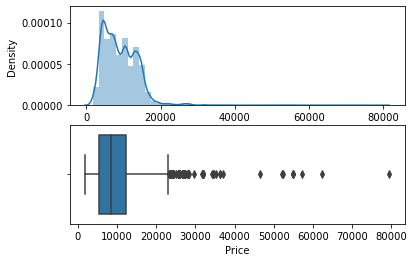

In [83]:
plot(data_train, 'Price')

In [84]:
data_train['Price'] = np.where(data_train['Price']>=40000, data_train['Price'].median(), data_train['Price'])

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


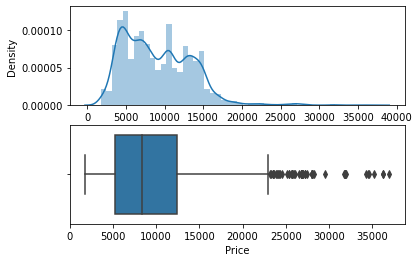

In [85]:
plot(data_train, 'Price')

In [86]:
x = data_train.drop('Price',axis=1) # Price in independent feature, so it needs to be removed
x.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_Hours,Duration_Minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,2019,1,10,22,20,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,2019,13,15,5,50,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,2019,4,25,9,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,2019,23,30,18,5,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,2019,21,35,16,50,4,45


In [87]:
x.shape

(10682, 35)

In [88]:
y = data_train['Price'] #Independent Feature
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [89]:
from sklearn.feature_selection import mutual_info_classif

In [90]:
mutual_info_classif(x,y)

array([2.18271013e+00, 2.03952489e+00, 2.72257046e+00, 2.30377984e+00,
       1.48537450e+00, 7.09524473e-01, 7.71428687e-01, 9.91260719e-02,
       6.73859480e-01, 9.08058670e-01, 2.66588040e-03, 5.50894208e-01,
       0.00000000e+00, 3.22722198e-01, 4.75195778e-03, 2.24523550e-01,
       0.00000000e+00, 1.59498741e-01, 1.53261720e+00, 8.76215786e-01,
       2.83700216e-01, 1.52944209e+00, 4.03108090e-01, 3.03847662e-01,
       1.66016790e-01, 3.86339297e-01, 1.09812445e+00, 8.88347378e-01,
       1.47533919e+00, 1.82893500e+00, 1.50578672e+00, 1.40542563e+00,
       1.19194370e+00, 1.77737024e+00, 1.06472029e+00])

In [91]:
imp = pd.DataFrame(mutual_info_classif(x,y), index=x.columns)
imp

,0
Total_Stops,2.172133
Route_1,2.023156
Route_2,2.776670
Route_3,2.314614
Route_4,1.497727
Route_5,0.725457
Air India,0.747643
GoAir,0.094598
IndiGo,0.690241
Jet Airways,0.934561


In [92]:
imp.columns = ['Importance']
imp.sort_values(by='Importance', ascending=False)

,Importance
Route_2,2.776670
Route_3,2.314614
Total_Stops,2.172133
Route_1,2.023156
Arrival_Time_hour,1.867733
Duration_Hours,1.784069
Arrival_Time_minute,1.553266
Cochin,1.552654
Delhi,1.521038
Route_4,1.497727


### Random Forest

##### Can be used in Classification as well as Regression problems
##### Follows Ensemble Learning Approach (Learns from multiple models & at the end, it combined all the learning)
##### Random Forest is combination of multiple Decision Trees

### Decision Trees :

##### Can be used in Classification as well as Regression problems
##### It is a base algorithm which is used in Ensemble Learning (Random Forest, XGBoost)
##### Takes a decision based on conditions provided

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2)

In [95]:
from sklearn import metrics

In [96]:
def predict(ml_model):
    model = ml_model.fit(x_train,y_train)
    print('Training Score : {}'.format(model.score(x_train, y_train)))
    y_prediction = model.predict(x_test)
    print('Predictions are :\n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score is : {}'.format(r2_score))
    
    print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_prediction))
    print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_prediction))
    print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    
    sns.distplot(y_test-y_prediction)

In [97]:
from sklearn.ensemble import RandomForestRegressor

Training Score : 0.9536388476090539
Predictions are :
 [ 3557.35  7366.23  4839.44 ...  8669.99 14264.42  4376.87]


r2 score is : 0.8360943844507008
Mean Absolute Error :  1148.9981051097034
Mean Squared Error :  3335612.8328164467
Root Mean Squared Error :  1826.36601830423


C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


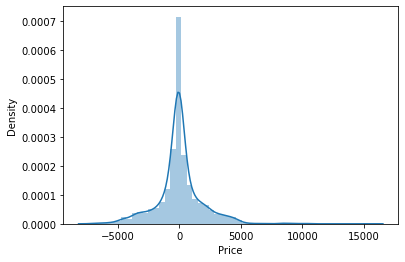

In [98]:
predict(RandomForestRegressor())

Training Score : 0.9536980201164184
Predictions are :
 [ 3552.156       7419.9         4812.4        ...  8736.4
 14151.25283333  4349.79      ]


r2 score is : 0.8352651751630388
Mean Absolute Error :  1144.1545683564475
Mean Squared Error :  3352487.91749092
Root Mean Squared Error :  1830.9800428980432


C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


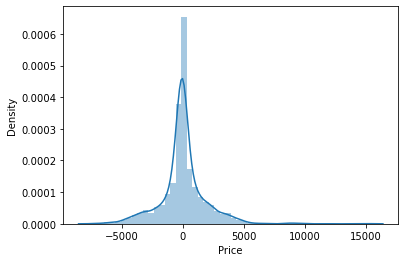

In [100]:
#For dumping the model
import pickle
def predict(ml_model, dump):
    model = ml_model.fit(x_train,y_train)
    print('Training Score : {}'.format(model.score(x_train, y_train)))
    y_prediction = model.predict(x_test)
    print('Predictions are :\n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test, y_prediction)
    print('r2 score is : {}'.format(r2_score))
    
    print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_prediction))
    print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_prediction))
    print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        file = open("D:\Projects\Airline Ticket Fare Prediction/model.pkl",'wb')
        pickle.dump(model, file)

from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor(),1)

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training Score : 0.6151365592251312
Predictions are :
 [ 4361.20329707  8823.61365295  4344.88032887 ... 10300.28291359
 13702.98922659  3517.53107897]


r2 score is : 0.6172061900265748
Mean Absolute Error :  1988.3188931780019
Mean Squared Error :  7790165.947584684
Root Mean Squared Error :  2791.0868756784844


C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


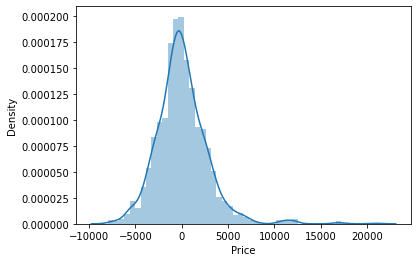

In [104]:
predict(LinearRegression(),0)

Training Score : 0.9675893992767225
Predictions are :
 [ 3543.   8372.   4804.  ...  9211.  13892.5  4107. ]


r2 score is : 0.7335093226096392
Mean Absolute Error :  1365.601895180159
Mean Squared Error :  5423302.431403707
Root Mean Squared Error :  2328.7984952339066


C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


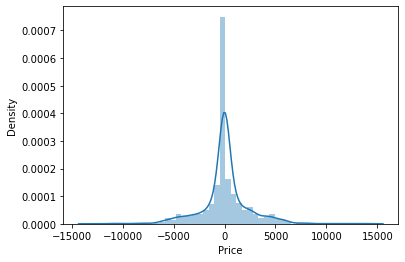

In [105]:
predict(DecisionTreeRegressor(),0)

Training Score : 0.7812993386336263
Predictions are :
 [ 5252.4  8214.6  5159.6 ...  8412.8 15029.4  4543.8]


r2 score is : 0.6565586818800082
Mean Absolute Error :  1773.7620963968182
Mean Squared Error :  6989310.672494151
Root Mean Squared Error :  2643.730446262279


C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


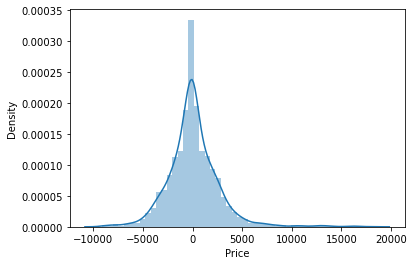

In [106]:
predict(KNeighborsRegressor(),0)

### Cross Validating the Model

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [108]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=4)]

In [109]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : max_depth,
    'min_samples_split' : [5,10,15,100]
}

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
reg_rf = RandomForestRegressor()

In [113]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [114]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, verbose=2, n_jobs=-1)

In [115]:
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [116]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 21}

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

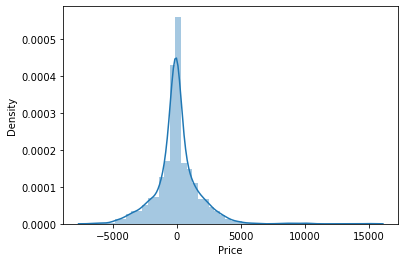

In [117]:
prediction = rf_random.predict(x_test)
sns.distplot(y_test-prediction)

In [118]:
metrics.r2_score(y_test, prediction)

0.8602406645225857

In [119]:
#Previous = 83%, now - 86%

In [120]:
file = open("D:\Projects\Airline Ticket Fare Prediction/rf_random.pkl",'wb')

In [121]:
pickle.dump(rf_random,file)

In [126]:
model = open("D:\Projects\Airline Ticket Fare Prediction/model.pkl",'rb')
forest = pickle.load(model)
predictions2 = forest.predict(x_test)
metrics.r2_score(y_test, predictions2)

0.8352651751630388